##### imports

In [1]:
import ingenos
import matplotlib
import matplotlib.pyplot as plt
import matplotlib_venn
from matplotlib_venn import venn3_unweighted, venn3_circles
import numpy as np
import pandas as pd
import re

##### set base directories for each data type

In [2]:
amp_base = "/afs/crc.nd.edu/group/BesanskyNGS/data05/comp_karyo/data/amplicon_sequencing"
oa_base = "/afs/crc.nd.edu/group/BesanskyNGS/data05/comp_karyo/data/open_array"

##### read in lists of SNPs, as saved during the analysis of each data type

In [3]:
amp_SNPs = pd.read_csv(amp_base + "/amp_SNP_list.041320.csv")

amp_SNPs.head()

,label,assay
0,NaN,NaN
1,a,2L_20674783_a
2,a,2L_20726658_a
3,a,2L_20813877_a
4,a,2L_20995428_a


In [4]:
amp_SNPs = amp_SNPs[1:]

amp_SNPs.head()

,label,assay
1,a,2L_20674783_a
2,a,2L_20726658_a
3,a,2L_20813877_a
4,a,2L_20995428_a
5,a,2L_21120275_a


##### clean and reformat

In [5]:
amp_SNPs["chrom"] = amp_SNPs["assay"].str.split("_", expand=True)[0]
amp_SNPs["pos"] = amp_SNPs["assay"].str.split("_", expand=True)[1]
amp_SNPs["pos"] = amp_SNPs["pos"].astype(int)

amp_SNPs.head()

,label,assay,chrom,pos
1,a,2L_20674783_a,2L,20674783
2,a,2L_20726658_a,2L,20726658
3,a,2L_20813877_a,2L,20813877
4,a,2L_20995428_a,2L,20995428
5,a,2L_21120275_a,2L,21120275


In [6]:
oa_SNPs = pd.read_csv(oa_base + "/oa_SNP_list.041320.csv")

oa_SNPs.head()

,label,pos
0,NaN,NaN
1,a,20546192.0
2,a,20731296.0
3,a,20816241.0
4,a,21590819.0


In [7]:
oa_SNPs = oa_SNPs[1:]
oa_SNPs["pos"] = oa_SNPs["pos"].astype(int)

oa_SNPs.head()

,label,pos
1,a,20546192
2,a,20731296
3,a,20816241
4,a,21590819
5,a,21687929


##### also read in the targets for the in silico approach

In [8]:
comp_base = "/afs/crc.nd.edu/group/BesanskyNGS/data05/comp_karyo/data"

In [9]:
a_top = pd.read_csv(comp_base + "/results/2La/comp/predictive_SNPs_train_set_0995_110918.tsv",
               sep = "\t", header=None)

j_top = pd.read_csv(comp_base + "/results/2Rj/comp/predictive_SNPs_train_set_08_110918.tsv",
               sep = "\t", header=None)

b_top = pd.read_csv(comp_base + "/results/2Rb/comp/predictive_SNPs_train_set_08_110918.tsv",
               sep = "\t", header=None)

c_col_top =\
pd.read_csv(comp_base + "/results/2Rc/comp/col_predictive_SNPs_train_set_08_031919.tsv",
                       sep = "\t", header=None)

c_gam_top =\
pd.read_csv(comp_base + "/results/2Rc/comp/gam_ss_predictive_SNPs_train_set_08_031919.tsv",
           sep = "\t", header=None)

u_top = pd.read_csv(comp_base + "/results/2Ru/comp/predictive_SNPs_train_set_08_110918.tsv",
               sep = "\t", header=None)

d_top = pd.read_csv(comp_base + "/results/2Rd/comp/predictive_SNPs_train_set_08_052619.tsv",
               sep = "\t", header=None)

##### reformat

In [10]:
a_top["chrom"] = "2L"
a_top["label"] = "a"

j_top["chrom"] = "2R"
j_top["label"] = "j"

b_top["chrom"] = "2R"
b_top["label"] = "b"

c_col_top["chrom"] = "2R"
c_col_top["label"] = "c_col"

c_gam_top["chrom"] = "2R"
c_gam_top["label"] = "c_gam"

u_top["chrom"] = "2R"
u_top["label"] = "u"

d_top["chrom"] = "2R"
d_top["label"] = "d"

comp = pd.concat([a_top, j_top, b_top, c_col_top, c_gam_top, u_top, d_top])

comp.rename(columns = {0 : "pos"}, inplace=True)

comp = comp[["chrom","pos","label"]]

comp.head()

,chrom,pos,label
0,2L,20528221,a
1,2L,20542311,a
2,2L,20542372,a
3,2L,20542904,a
4,2L,20546192,a


##### check that labels are in same order for all three data sets

In [11]:
comp["label"].unique()

array(['a', 'j', 'b', 'c_col', 'c_gam', 'u', 'd'], dtype=object)

In [12]:
comp["label"].unique() == amp_SNPs["label"].unique()

array([ True,  True,  True,  True,  True,  True,  True])

In [13]:
amp_SNPs["label"].unique() == oa_SNPs["label"].unique()

array([ True,  True,  True,  True,  True,  True,  True])

In [14]:
inversions_dummy = ["a", "dummy", "j", "b", "c_col", "c_gam", "d", "u"]

##### create Venn diagrams

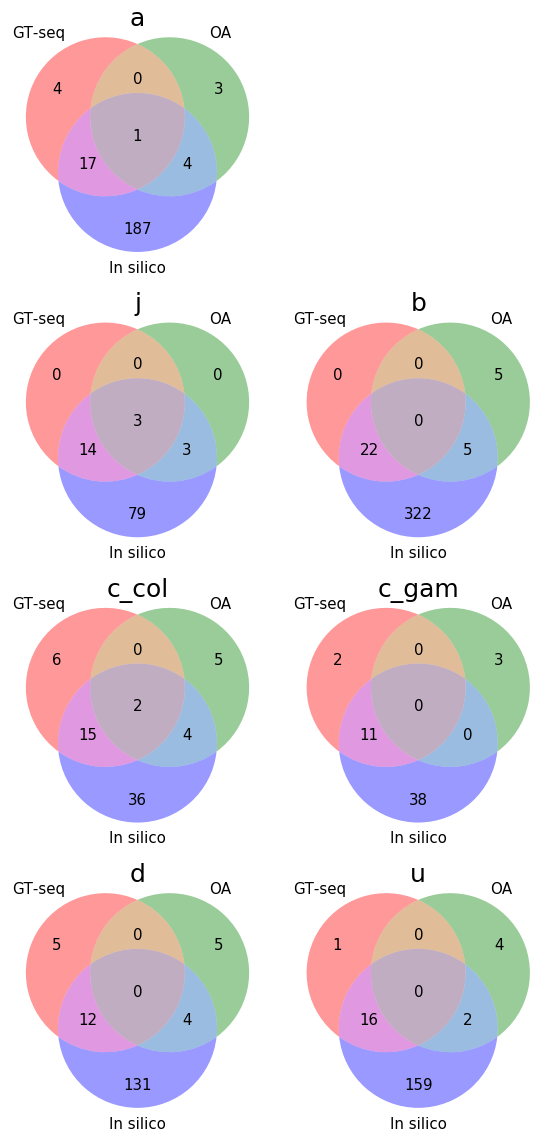

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8,16))

for i, inversion in enumerate(inversions_dummy):
    
    if inversion == "dummy":
        
        axes.flatten()[i].axis('off')
        
    else:
    
        v1 = venn3_unweighted(subsets=(set(amp_SNPs.loc[amp_SNPs["label"] == inversion, "pos"]), 
                        set(oa_SNPs.loc[oa_SNPs["label"] == inversion, "pos"]),
                       set(comp.loc[comp["label"] == inversion, "pos"])), 
              set_labels = ("GT-seq", "OA", "In silico"), alpha = 0.4, 
                   ax=axes.flatten()[i])

        for label in v1.set_labels: label.set_fontsize(15)
        for label in v1.subset_labels: 
            if label is not None:
                label.set_fontsize(15)

        axes.flatten()[i].set_title(inversion, fontsize=25, y = 0.95)

plt.tight_layout()
            
outString = ingenos.make_date_stamp(
    amp_base + "/results/three_methods_snp_overlap_a")

#plt.savefig(outString);